In [8]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("C:/Users/jaina/Downloads/ESC-50-master/meta/esc50.csv")
clip,sample_rate=librosa.load("C:/Users/jaina/Downloads/ESC-50-master/audio/"+str(df.iloc[2,0]))
print("Sample Rate  {} Hz".format(sample_rate))
print("Clip Length  {:3.2f} sec".format(len(clip)/sample_rate))

Sample Rate  22050 Hz
Clip Length  5.00 sec


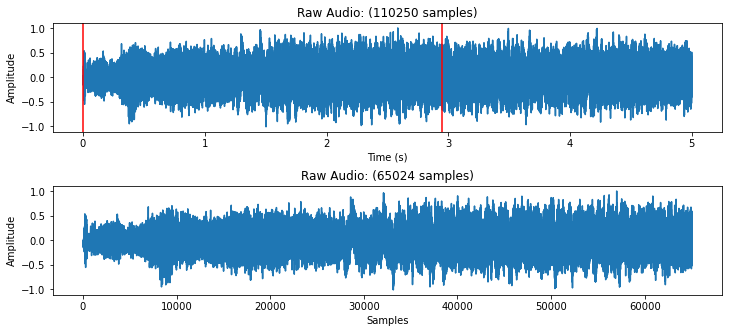

In [10]:
timesteps = np.arange(len(clip)) / sample_rate  

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

ax[0].plot(timesteps, clip)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: ({} samples)'.format(len(clip)))


n_fft = 512*127 
start = 0  
x = clip[start:start+n_fft]


ax[0].axvline(start/sample_rate, c='r') 
ax[0].axvline((start+n_fft)/sample_rate, c='r')

# plot N samples 
ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio: ({} samples)'.format(len(x)));

In [11]:
parent_directory="C:/Users/jaina/Downloads/ESC-50-master/audio/"
processed_dir="C:/Users/jaina/Downloads/ESC-50-master/pro_dir_images"

In [12]:
melspec_params = {
    'n_mels': 128,
    'hop_length': 512,
    'n_fft': 1024,
    'fmin': 20
}

In [13]:
def load_audio(file_path):
    y, sr = librosa.load(file_path)
    return y, sr

def create_melspec(params, audio_data, sampling_rate):
    S = librosa.feature.melspectrogram(audio_data, 
                                       sr=sampling_rate, 
                                       n_mels=params['n_mels'],
                                       hop_length=params['hop_length'],
                                       n_fft=params['n_fft'],
                                       fmin=params['fmin'],
                                       fmax=(sampling_rate // 2))
    Sb = librosa.power_to_db(S, ref=np.max)
    Sb = Sb.astype(np.float32)
    
    return Sb
        
def mono_to_color(X, mean=None, std=None, norm_max=None, norm_min=None, eps=1e-6):
    X = np.stack([X, X, X], axis=-1)
    mean = mean or X.mean()
    X = X - mean
    std = std or X.std()
    Xstd = X / (std + eps)
    _min, _max = Xstd.min(), Xstd.max()
    norm_max = norm_max or _max
    norm_min = norm_min or _min
    if (_max - _min) > eps:
        V = Xstd
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.astype(np.uint8)
    else:
        V = np.zeros_like(Xstd, dtype=np.uint8)
    return V  

def display_melspec(params, mels, sampling_rate): 
    librosa.display.specshow(mels, x_axis='time', y_axis='mel',
                             sr=sampling_rate, hop_length=params['hop_length'],
                             fmin=params['fmin'], fmax=(sampling_rate // 2))
    plt.colorbar()
    plt.show()

C:\Users\jaina\anaconda3\envs\gpu\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\jaina\anaconda3\envs\gpu\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


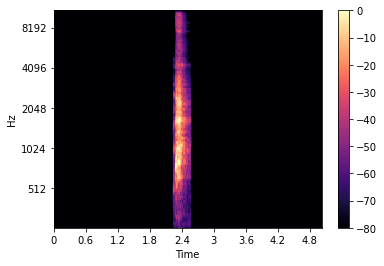

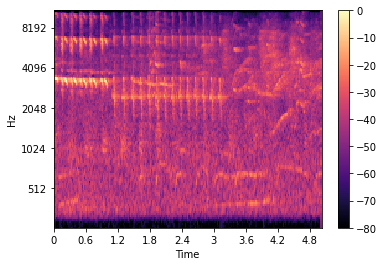

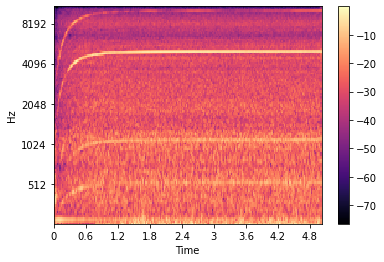

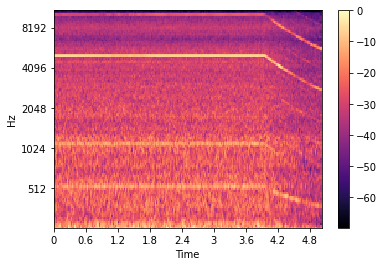

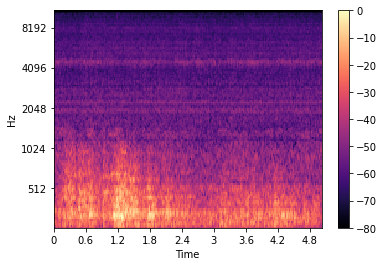

KeyboardInterrupt: 

In [14]:
for i in range(df.shape[0]):

    y, sr = load_audio(parent_directory + '/'+str(df.iloc[i,0]))
    timesteps = np.arange(len(y)) / sr
    melspec = create_melspec(melspec_params, y, sr)
    display_melspec(melspec_params, melspec, sr)
    melspec_color = mono_to_color(melspec)
    dst_fname=processed_dir + '/'+ str(df.iloc[i,0][:-4] + '.png')
    plt.imsave(dst_fname, melspec_color)
